In [ ]:
Granger Causality

In [ ]:
pip install statsmodels networkx

C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\statsmodels\tsa\stat

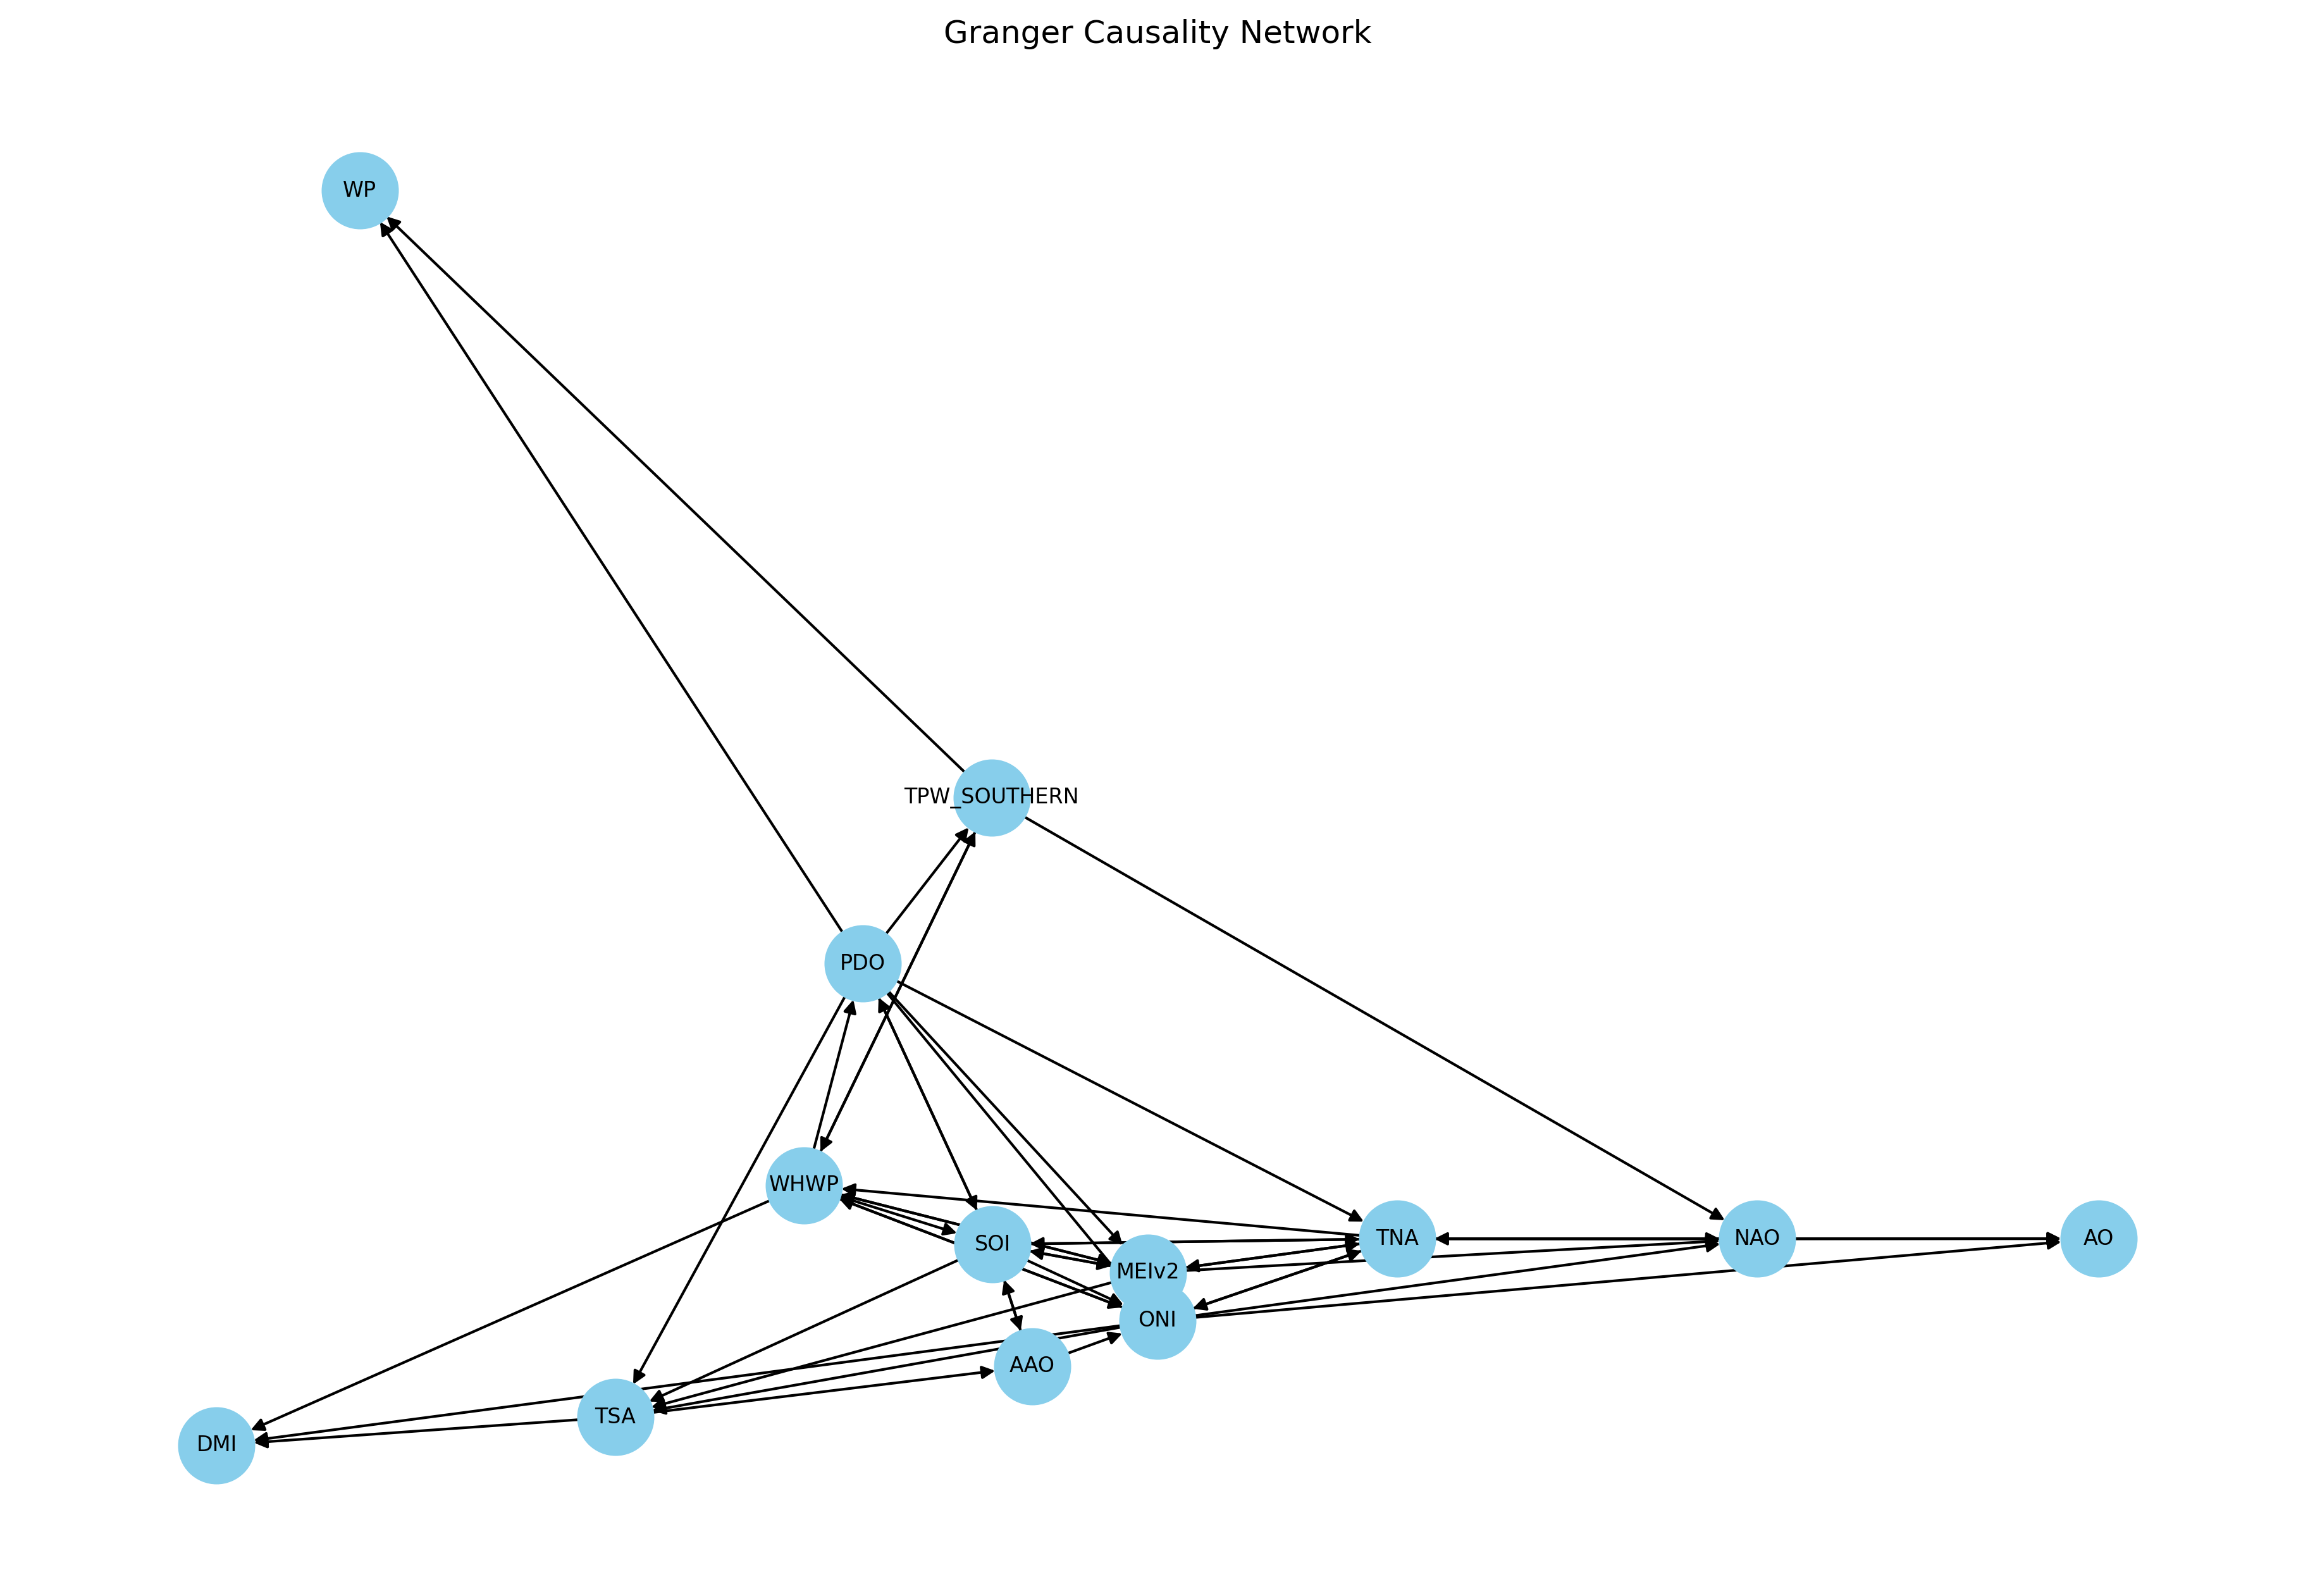

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.impute import SimpleImputer

# Specify the path to the directory containing the CSV files
path_to_files = 'C:/Users/Subhadeep Maishal/Music/JUP/test_data/'

# Get a list of all CSV files in the directory
csv_files = sorted(Path(path_to_files).glob('data_*.csv'))

# Create an empty directed graph to represent the network
G = nx.DiGraph()

# Iterate through each combination of files
for i, file_path1 in enumerate(csv_files):
    for j, file_path2 in enumerate(csv_files):
        if i != j:  # Avoid comparing a file with itself
            # Extract file names without extension
            file_name1 = file_path1.stem
            file_name2 = file_path2.stem

            # Read the CSV files and convert 'record' column to datetime64[ns]
            data1 = pd.read_csv(file_path1, parse_dates=['record'])
            data2 = pd.read_csv(file_path2, parse_dates=['record'])

            # Convert 'record' column to numerical values (int32)
            data1['record'] = (data1['record'].astype('int64') // 10**9).astype('int32')  # Convert to seconds
            data2['record'] = (data2['record'].astype('int64') // 10**9).astype('int32')  # Convert to seconds

            # Extract columns named 'record' and 'IITKGP'
            record1 = data1['record']
            IITKGP1 = data1['IITKGP']

            record2 = data2['record']
            IITKGP2 = data2['IITKGP']

            # Combine records and IITKGP columns
            merged_data = pd.concat([record1, IITKGP1, record2, IITKGP2], axis=1)

            # Remove rows with NaN values
            merged_data = merged_data.dropna()

            # Check for NaN or inf values in the data
            if merged_data.isnull().values.any() or not np.isfinite(merged_data).all().all():
                print(f"NaN or inf values detected in data for {file_name1} and {file_name2}")
                continue

            # Perform Granger causality test
            max_lag = 1  # Corresponding to 1 month of data
            try:
                test_result = grangercausalitytests(merged_data[['IITKGP']], max_lag, verbose=False)
            except ValueError as e:
                print(f"Error for {file_name1} and {file_name2}: {e}")
                continue

            # Extract p-values from the test results
            p_values = [test_result[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

            # Add directed edge to the graph if Granger causality is significant
            for lag, p_value in enumerate(p_values):
                if p_value < 0.05:  # Adjust the significance level as needed
                    G.add_edge(file_name1, file_name2, weight=1 / (lag + 1))  # Use the reciprocal of lag as the weight

# Create and visualize the network plot with enhanced features
pos = nx.spring_layout(G)
labels = {node: node.replace("data_", "") for node in G.nodes}  # Remove "data_" from node labels
weights = [G[u][v]['weight'] for u, v in G.edges]

plt.figure(figsize=(12, 8), dpi=300)  # Set DPI for better resolution
nx.draw(G, pos, with_labels=True, labels=labels, font_size=8, font_color='black',
        node_size=800, node_color='skyblue', edge_color='black', width=weights, edge_cmap=plt.cm.Blues)
plt.title('Granger Causality Network')
plt.show()


In [25]:
# Print your name
your_name = "my name Subhadeep Maishal" ""
print("Hello, " + your_name + "!")


Hello, my name Subhadeep Maishal!
